# Analiza zawartości serwisu Github

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Analiza repozytoriów GitHub 
## 1.1 Najpopularniejsze repozytoria
Repozytoria z najwiekszą liczbą obserwujących

In [0]:
query1 = """SELECT repo_name, watch_count
        FROM `bigquery-public-data.github_repos.sample_repos`
        ORDER BY watch_count DESC 
        LIMIT 1000"""

In [0]:
df = pd.read_gbq(query = query1, project_id = 'just-tracer-241713', dialect = 'standard')

In [0]:
df.columns = ['Repository name', 'watch count']
df.head()

,Repository name,watch count
0,FreeCodeCamp/FreeCodeCamp,90457
1,firehol/netdata,13208
2,joshbuchea/HEAD,13125
3,braydie/HowToBeAProgrammer,12019
4,sindresorhus/awesome,11063


<Figure size 432x288 with 0 Axes>

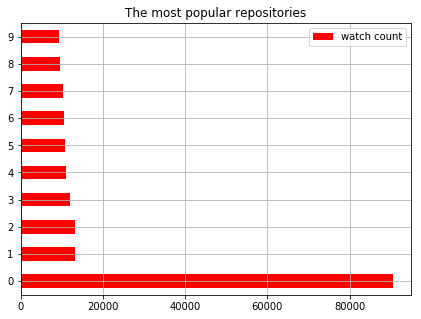

In [0]:
plt.figure()
df.head(10).plot(kind='barh',figsize=(7,5),grid=True, color = ['red'], 
                     label='Number of repositories',legend='No of file',
                       title='The most popular repositories')

Text(0.5, 1.0, 'The most popular repositories')

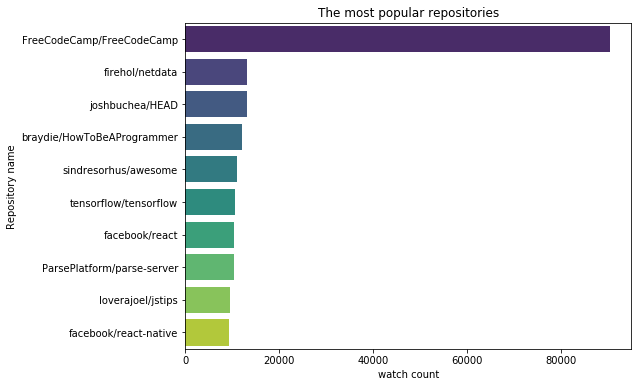

In [0]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'watch count', y = 'Repository name', data = df.head(10), palette = 'viridis')
plt.title('The most popular repositories')

Według danych najpopularniejszym repozytorium na GitHub jest FreeCodeCamp, która jest opensourcową bazą danych dla bezpłatnej nauki. Liczba obserwujących wynosi ponad 90 tysięcy i zdecydowanie wyprzedza kolejne repozytoria na liście z zaledwie 13 tyś. obserwujących. Wynika z tego, iż największą popularnością cieszą się repozytoria służące do darmowej wspólnej nauki programowania. 

## 1.2 Repozytoria z najwiekszą liczbą plików


In [0]:
query_file = """SELECT repo_name, COUNT(path) AS num_file
FROM `bigquery-public-data.github_repos.files` AS sample_files
GROUP BY
  repo_name
  ORDER BY
  num_file DESC
  LIMIT 500"""

In [0]:
df_file = pd.read_gbq(query = query_file, project_id = 'just-tracer-241713', dialect = 'standard')

In [0]:
df_file.head()

,repo_name,num_file
0,cdnjs/cdnjs,5280656
1,sufuf3/cdnjs,5280654
2,extend1994/cdnjs,5280654
3,jonobr1/cdnjs,4925081
4,seogi1004/cdnjs,4875576


In [0]:
df_file.describe()

,num_file
count,5.000000e+02
mean,1.053326e+06
std,1.030974e+06
min,2.749590e+05
25%,3.476110e+05
50%,7.279225e+05
75%,1.359834e+06
max,5.280656e+06


In [0]:
df_file2 = df_file.set_index('repo_name')
df_file2.head()

,num_file
repo_name,
cdnjs/cdnjs,5280656
sufuf3/cdnjs,5280654
extend1994/cdnjs,5280654
jonobr1/cdnjs,4925081
seogi1004/cdnjs,4875576


<Figure size 432x288 with 0 Axes>

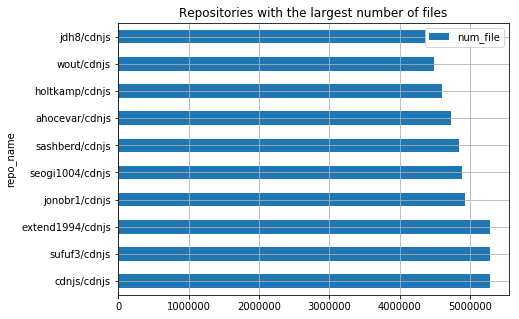

In [0]:
plt.figure()
df_file2.head(10).plot(kind='barh',figsize=(7,5),grid=True, label='Number of repositories',legend='No of file',
                       title='Repositories with the largest number of files')

Największymi repozytoriami pod względem ilości plików są *cdnjs/cdnjst*, *sufuf3/cdnjs* oraz *extend1994/cdnjs*, które posiadają ponad 5 mln plików. Potwierdza to tylko popularność GitHub jako narzędzia do przechowywania kodu oraz wspólnej pracy.

# 2. Analiza komitów na GitHub
## 2.1 Użytkownicy z największą ilością komitów

In [1]:
query_com = """SELECT  
author.name as author, COUNT(commit) AS commits_number
FROM `bigquery-public-data.github_repos.commits` commits
GROUP BY author
ORDER BY commits_number DESC
LIMIT 10"""

In [0]:
df_aut = pd.read_gbq(query = query_com, project_id = 'just-tracer-241713', dialect = 'standard')

In [0]:
df_aut.head()

,author,commits_number
0,shenzhouzd,1188430
1,Auto Pilot,825592
2,Duane F. King,597940
3,Marge Spiderworthy,495786
4,Curt Clifton,384915


Text(0.5, 1.0, 'Users with the largest number of commits')

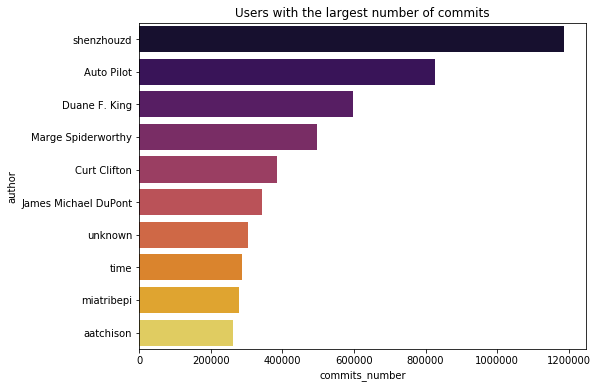

In [0]:
plt.figure(figsize = (8,6))
sns.barplot(y = 'author', x = 'commits_number', data = df_aut.head(10), palette = 'inferno')
plt.title('Users with the largest number of commits')

Najbardziej aktywnym użytkownikiem był "shenzhouzd", który wykonał ponad 1,1 mln komitów, zaś kolejni użytkownicy wykonali ponad 800 i 500 tys. Tak imponująca ilość komitów wykonana przez użytkowników świadczy o dużej popularności narzędzia pośród programistów.

## 2.2 Repozytoria z największą liczbą komitów

In [0]:
query2_1 = """SELECT sample_commits.repo_name, COUNT(commit) AS num_commits
FROM `bigquery-public-data.github_repos.sample_commits` AS sample_commits
GROUP BY sample_commits.repo_name
ORDER BY num_commits DESC"""

In [0]:
df2 = pd.read_gbq(query = query2_1, project_id = 'just-tracer-241713', dialect = 'standard')

In [0]:
df2_2 = df2.set_index('repo_name')
df2_2.head()

,num_commits
repo_name,
torvalds/linux,602604
apple/swift,38891
twbs/bootstrap,11777
Microsoft/vscode,6909
facebook/react,6875


In [0]:
df2_2.sum()  # Całkowita liczba komitów w repozytoriach

num_commits    672309
dtype: int64

<Figure size 432x288 with 0 Axes>

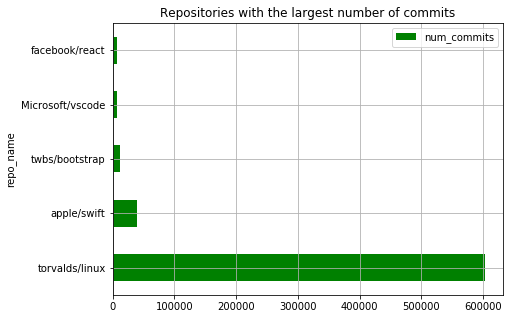

In [0]:
plt.figure()
df2_2.head(5).plot(kind='barh',figsize=(7,5),grid=True, color = ['green'], label='Number of repositories',legend='No of commits',
                       title='Repositories with the largest number of commits')

Dane pochodzą ze zbioru sample.repos. Wynika z nich, iż repozytorium z największą liczbą komitów to torvalds/linux z ponad 600 tys. komitów. Kolejne repozytoria posiadają juz stosunkowo mniej komitów.

# 3. Analiza języków programowania na GitHub
## 3.1 Najpopularniejsze języki

In [0]:
query_lang = """WITH lang as (
        SELECT language.name AS name
        FROM `bigquery-public-data.github_repos.languages` l
        CROSS JOIN UNNEST(l.language) as language
        )
        SELECT name, COUNT(*) AS count
        FROM lang
        GROUP BY name
        ORDER BY count DESC"""

In [0]:
df_lan = pd.read_gbq(query = query_lang, project_id = 'just-tracer-241713', dialect = 'standard')

In [0]:
df_lan.head(11)

,name,count
0,JavaScript,1109504
1,CSS,823170
2,HTML,786897
3,Shell,641343
4,Python,551252
5,Ruby,378118
6,Java,371532
7,PHP,343454
8,C,294519
9,C++,280587


In [0]:
df_lan.columns = ['language_name', 'count']
df_lan.head()


,language_name,count
0,JavaScript,1109504
1,CSS,823170
2,HTML,786897
3,Shell,641343
4,Python,551252


Text(0.5, 1.0, 'The most popular languages')

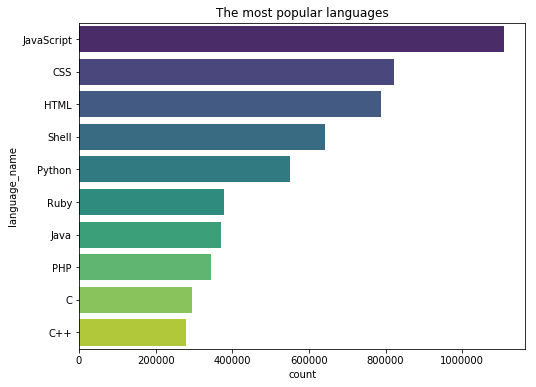

In [0]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'count', y = 'language_name', data = df_lan.head(10), palette = 'viridis')
plt.title('The most popular languages')

Najpopularniejszym językiem na GitHub jest JavaScript , który występuje w ponad 1,1 mln repozytoriów. Kolejnymi często używanym językami są HTML i CSS z ok. 800 tys. repozytoriów. Dwa dość popularne w ostatnim czasie języki Python oraz Java plasują się kolejno na 5 i 7 miejscu.

## 3.2 Liczba plików JavaScript w repozytoriach

In [0]:
query4 = """SELECT COUNT(*) AS num_js
FROM `bigquery-public-data.github_repos.sample_files`
WHERE path LIKE '%.js'
LIMIT 500"""

In [0]:
df_js = pd.read_gbq(query = query4, project_id = 'just-tracer-241713', dialect = 'standard')

In [0]:
df_js

,num_js
0,5939091


Całkowita liczba plików JavaScript w repozytoriach wynosi prawie 6 milionów. Znaczna ilość plików świadczy o dużej popularności tego języka wśród programistów. Dlatego też JavaScript jest najpopularniejszym językiem na GitHub.

## 3.3 Repozytoria z największą liczbą plików JavaScript

In [0]:
query4_1 = """SELECT sample_files.repo_name, COUNT(path) AS num_file
FROM `bigquery-public-data.github_repos.sample_files` AS sample_files
WHERE path LIKE '%.js'
GROUP BY
  repo_name
  ORDER BY
  num_file DESC
  LIMIT 1000"""

In [0]:
df_js2 = pd.read_gbq(query = query4_1, project_id = 'just-tracer-241713', dialect = 'standard')

In [0]:
df_js2.head()

,repo_name,num_file
0,cdnjs/cdnjs,602357
1,Piicksarn/cdnjs,565786
2,bootcdn/cdnjs,505563
3,jsdelivr/jsdelivr,81845
4,rahulpnath/Blog,81008


In [0]:
df_fjs = df_js2.set_index('repo_name')
df_fjs.head()

,num_file
repo_name,
cdnjs/cdnjs,602357
Piicksarn/cdnjs,565786
bootcdn/cdnjs,505563
jsdelivr/jsdelivr,81845
rahulpnath/Blog,81008


<Figure size 432x288 with 0 Axes>

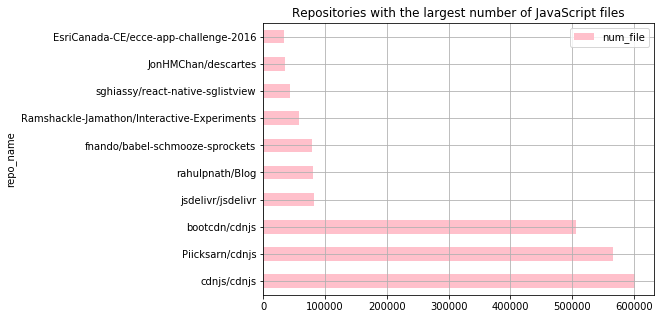

In [0]:
plt.figure()
df_fjs.head(10).plot(kind='barh',figsize=(7,5),grid=True, color = ['pink'], label='Number of repositories',legend='No of file',
                       title='Repositories with the largest number of JavaScript files')

Repozytorium z największą ilością plików JavaScript jest *cdnjs/cdnjs* z ponad 600 tys. plików, natomiast kolejne zawierają ponad 500 tys. Duża ilość plików, rownież świadczy o wielkiej popularności języka JavaScript wśród użytkowników serwisu.



## 3.4 Repozytoria z największą liczbą komitów JavaScript

In [0]:
query4_2 = """SELECT sample_commits.repo_name, COUNT(commit) AS num_commits
FROM `bigquery-public-data.github_repos.sample_commits` AS sample_commits
JOIN  `bigquery-public-data.github_repos.sample_files` AS sample_files
ON sample_commits.repo_name = sample_files.repo_name
WHERE path LIKE '%.js' 
GROUP BY sample_commits.repo_name
ORDER BY num_commits DESC
"""

In [0]:
df_js3 = pd.read_gbq(query = query4_2, project_id = 'just-tracer-241713', dialect = 'standard')

In [0]:
df_js3.head()

,repo_name,num_commits
0,facebook/react,2832500
1,twbs/bootstrap,694843
2,Microsoft/vscode,462903
3,apple/swift,38891
4,tensorflow/tensorflow,36771


In [0]:
df_js3.columns = ['Repository_name', 'number of commits']
df_js3.head(10)

,Repository_name,number of commits
0,facebook/react,2832500
1,twbs/bootstrap,694843
2,Microsoft/vscode,462903
3,apple/swift,38891
4,tensorflow/tensorflow,36771


In [0]:
df_js3.sum()  #Całkowita liczba commitów JavaScript

Repository_name      facebook/reacttwbs/bootstrapMicrosoft/vscodeap...
number of commits                                              4065908
dtype: object

Text(0.5, 1.0, 'Repositories with the largest number of JavaScript commits')

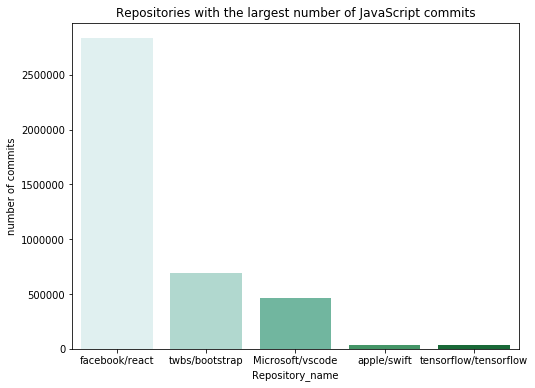

In [0]:
plt.figure(figsize=(8,6))
sns.barplot(y = 'number of commits', x = 'Repository_name', data = df_js3.head(10), palette = 'BuGn')
plt.title('Repositories with the largest number of JavaScript commits')

Dane pochodzą ze zbioru sample.files. Najwięcej komitów plików JavaScript ponad 2,8 mln zawiera repozytorium *facebook/react*, kolejne repozytorium *twbs/bootstrap* posiada już tylko ponad 600 tys. komitów. Znacza ilość komitów JavaScript, także potwierdza dużą popularność tego języka. 

## 3.5 Liczba plików Python w repozytoriach

In [0]:
query_py = """SELECT COUNT(*) AS num_py
FROM `bigquery-public-data.github_repos.sample_files`
WHERE path LIKE '%.py'
LIMIT 500"""

In [0]:
df_py = pd.read_gbq(query = query_py, project_id = 'just-tracer-241713', dialect = 'standard')

In [0]:
df_py

,num_py
0,1231972


Całkowita liczba plików python w repozytoriach wynosi ponad milion. Jest to pięć razy mniej niż plików języka JavaScript

## 3.6 Repozytoria z największą liczbą plików Python

In [0]:
query5 = """SELECT sample_files.repo_name, COUNT(path) AS num_file
FROM `bigquery-public-data.github_repos.sample_files` AS sample_files
WHERE path LIKE '%.py' 
GROUP BY
  repo_name
  ORDER BY
  num_file DESC
  LIMIT 1000"""

In [0]:
df_repo = pd.read_gbq(query = query5, project_id = 'just-tracer-241713', dialect = 'standard')

In [0]:
df_repo2 = df_repo.set_index('repo_name')
df_repo2.head()

,num_file
repo_name,
anhstudios/swganh,16380
mollstam/UnrealPy,12225
iridium-browser/iridium-browser-ubuntu,7873
JetBrains/intellij-community,7467
bugvm/bugvm-studio,6935


<Figure size 432x288 with 0 Axes>

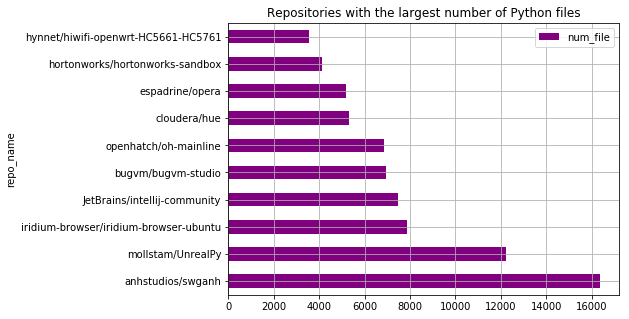

In [0]:
plt.figure()
df_repo2.head(10).plot(kind='barh',figsize=(7,5),grid=True, color = ['purple'], label='Number of repositories',legend='No of file',
                       title='Repositories with the largest number of Python files')

Repozytoria z największą ilością plików python to *anhstudios/swganh*, które zawiera ponad 16 tys. plików oraz *mollstam/UnrealPy* z ponad 12 tys/ plików. Ilość plików python w repozytoriach jest znacznie mniejsza niż plików JavaScript, jednkże widać dość duże zainteresowanie tym językiem pośród programistów. Warto rownież zwrócić uwagę, iż większość repozytoriów związana jest z projektami opensourcowymi rozwijanymi przez społeczność programistów,  co także rzutuje na wielkość ich repozytoriów.

## 3.7 Repozytoria z największą liczbą komitów Python

In [0]:
query6 = """SELECT sample_commits.repo_name, COUNT(commit) AS num_commits
FROM `bigquery-public-data.github_repos.sample_commits` AS sample_commits
JOIN  `bigquery-public-data.github_repos.sample_files` AS sample_files
ON sample_commits.repo_name = sample_files.repo_name
WHERE path LIKE '%.py' 
GROUP BY sample_commits.repo_name
ORDER BY num_commits DESC
"""

In [0]:
df_com = pd.read_gbq(query = query6, project_id = 'just-tracer-241713', dialect = 'standard')

In [0]:
df_com.colums = ['Repo_name', 'num_commits']
df_com.head()

,repo_name,num_commits
0,torvalds/linux,23501556
1,tensorflow/tensorflow,4128858
2,apple/swift,4044664
3,facebook/react,13750
4,Microsoft/vscode,6909


Text(0.5, 1.0, 'Repositories with the largest number of Python commits')

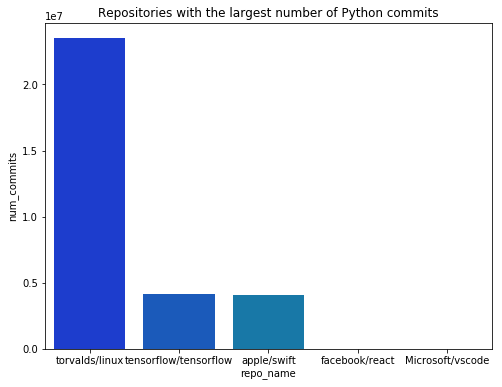

In [0]:
plt.figure(figsize=(8,6))
sns.barplot(y = 'num_commits', x = 'repo_name', data = df_com.head(5), palette = 'winter')
plt.title('Repositories with the largest number of Python commits')

Najwięcej komitów związanych z językiem python zawiera repozytorium *torvalds/linux* z ponad 23 mln komitów, kolejne *tensorflow/tensorflow* oraz *apple/swift* posiadają już tylko ponad 4 mln. W porównaniu do języka JavaScript, ilość komitów Python jest przeważająca, dzięki czemu widać rosnące zaiteresowanie tym językiem wśród programistów. 